In [1]:
%matplotlib widget
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import ElevationHandler, transform_coordinates, Line
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tempeature = 20 # [deg C]
c = 331.5 * np.sqrt(1 + tempeature / 273.15) # speed of sound in air [m/s]
f = 1000 # frequency [Hz]
wavelength = c/f # [m]
d = 1
dp = 1 # source-to-receiver distance, in metres, projected onto the ground planes [m]

In [3]:
Gr = Gs = Gm = 0.5 # for Porous ground (Implement mixed ground)
startPoint = np.array([0, 0, 0])
endPoint = np.array([10, 10, 10])
SR_line = Line(startPoint, endPoint)
d = SR_line.length_3d()
dp = SR_line.length_2d()
hs = 100 # height source [m]
hr = 0 # height receiver [m]
As = calcA(f, hs, Gs)
Ar = calcA(f, hr, Gr)
Am = calcAm(f, dp, hs, hr, Gm)
Agr = As + Ar + Am

hm = (hs + hr) / 2
Agr = 4.8 - (2 * hm / d) * (17 + (300 / d))
if Agr < 0:
    Agr = 0


NameError: name 'calcA' is not defined

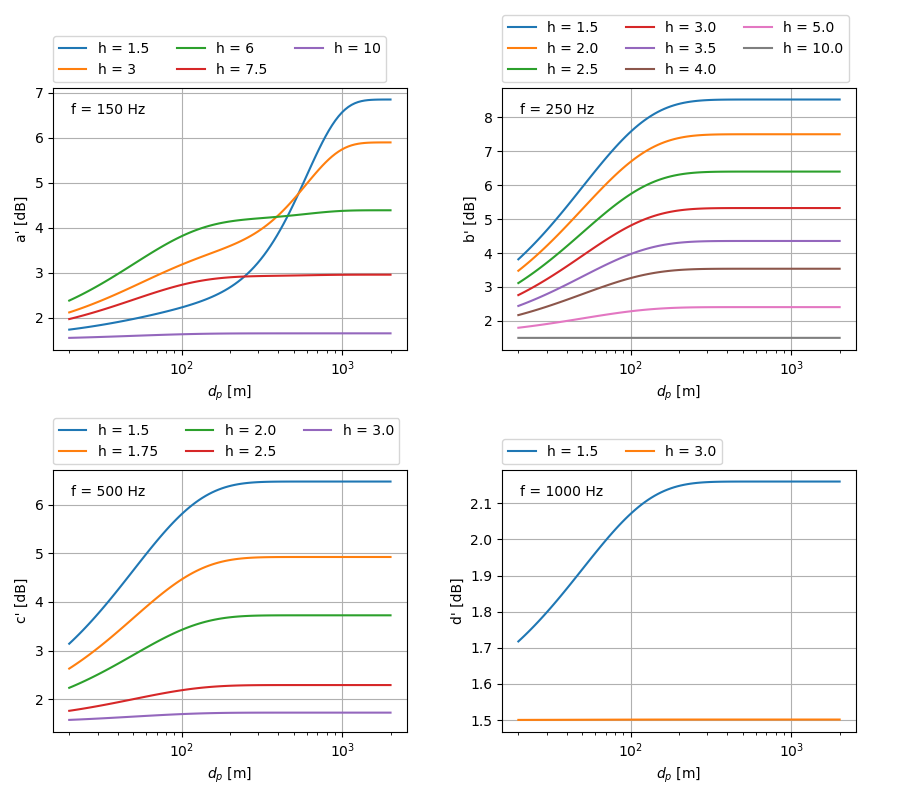

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fs = [150, 250, 500, 1000]
dp = np.logspace(np.log10(20), np.log10(2000), 100)
hs = [[1.5, 3, 6, 7.5, 10], [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 10.0], [1.5, 1.75, 2.0, 2.5, 3.0], [1.5, 3.0]]

fig, axes = plt.subplots(2, 2, figsize=(9, 8))

for i, f in enumerate(fs):
    for h in hs[i]:
        prime_labels = ['a', 'b', 'c', 'd']
        prime_formulas = [
            1.5 + 3.0 * np.exp(-0.12*(h - 5)**2) * (1 - np.exp(-dp/50)) + 5.7 * np.exp(-0.09 * h**2) * (1 - np.exp(-2.8 * 10**(-6) * dp**2)),
            1.5 + 8.6 * np.exp(-0.09*h**2) * (1 - np.exp(-dp/50)),
            1.5 + 14.0 * np.exp(-0.46*h**2) * (1 - np.exp(-dp/50)),
            1.5 + 5.0 * np.exp(-0.9*h**2) * (1 - np.exp(-dp/50))
        ]

        ax = axes[i // 2, i % 2]
        ax.semilogx(dp, prime_formulas[i], label=f"h = {h}")
        ax.grid(True)
        ax.set(ylabel=f"{prime_labels[i]}' [dB]")
    ax.text(0.05, 0.9, f"f = {f} Hz", transform=ax.transAxes)

plt.setp(axes, xlabel=r'$d_p$ [m]')

for ax in axes.flatten():
    ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncols=3, borderaxespad=0.)

plt.tight_layout()
plt.show()